# Pymaceuticals Inc.
---

## Analysis

#### 1. Effectiveness of Drug Regimens in Reducing Tumor Volume:
- **Capomulin and Ramicane** were the most promising treatments, with the lowest mean and median tumor volumes.
- Infubinol and Ceftamin showed promising results, but with higher final tumor volumes.
- A sample case demonstrated overall reduction in tumor size over time for this sample treated with **Capomulin**, despite intermittent increases observed after day 20 (see **Capomulin treatment of mouse l509**).

#### 2. Relationship Between Mouse Weight and Tumor Volume:
- A strong positive correlation (approximately 0.84) was observed between weight and average tumor volume for the Capomulin regimen.
- Heavier mice tended to have larger average tumor volumes, (see **Mouse Weight vs. Average Tumor Volume for Capomulin Regimen**).

#### 3. Distribution of Measurements, Gender, and Tumor Volume:
- Capomulin and Ramicane had the highest number of measurements, reflecting a focus on these treatments (see **Number of Observed Timepoints Per Drug Regimen**)
- The gender distribution was nearly even, minimizing potential bias.
- Capomulin and Ramicane had consistent final tumor volumes, while Infubinol had a potential outlier (see **Distribution of Tumor Volume for Each Treatment Group**).

#### 4. Data Integrity/Potential Follow-up:
- An outlier was detected in the Infubinol treatment group, warranting further investigation.
- A mouse with duplicate timepoints was identified and removed to accurate data.

### Conclusion:

- Positive trends were observed for **Capomulin** treatment, demonstrating effectiveness in reducing tumor volume a 45-day treatment period.
- Relationship between weight and tumor volume indicates weight may be a significant factor in treatment outcomes.
- Further investigation into outliers and long-term effects (beyond 45 days) may provide additional insights.
- **Capomulin** shows strong promise as an effective treatment for squamous cell carcinoma, and avoids unreliable outcomes of some other previous treatments that demonstrated effectiveness (ex. Infubinol, Ceftamin).
 

In [58]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
from pprint import pprint
import scipy.stats as st
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = Path("../Pymaceuticals/Resources/Mouse_metadata.csv")
study_results_path = Path("../Pymaceuticals/Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
num_unique_mice = len(study_data_complete["Mouse ID"].unique())
print(f'{num_unique_mice}')

249


In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete.drop(study_data_complete[study_data_complete['Mouse ID'] == 'g989'].index)
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(clean_study_data['Mouse ID'].unique())
print(f'{unique_mice}')

248


## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = clean_study_data.groupby('Drug Regimen')

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': grouped_data['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': grouped_data['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': grouped_data['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': grouped_data['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': grouped_data['Tumor Volume (mm3)'].sem()
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg = grouped_data['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
)
summary_stats_agg  

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

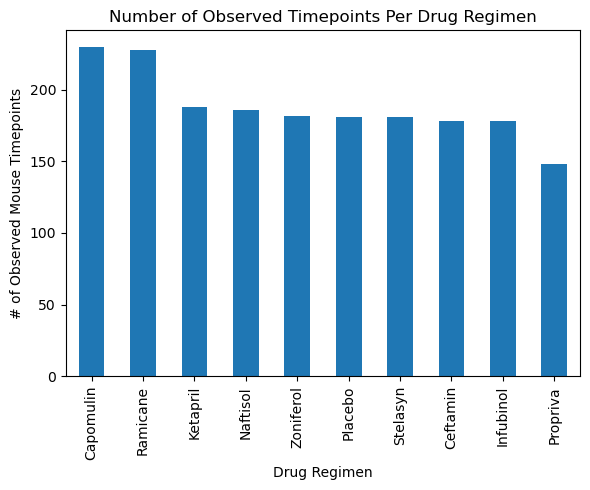

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate number of timepoints per drug regimen
timepoints_count = grouped_data['Timepoint'].count().sort_values(ascending=False)

# Plot the bar chart
timepoints_count.plot(kind='bar', color='#1f77b4', figsize=(6, 5))
plt.title('Number of Observed Timepoints Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

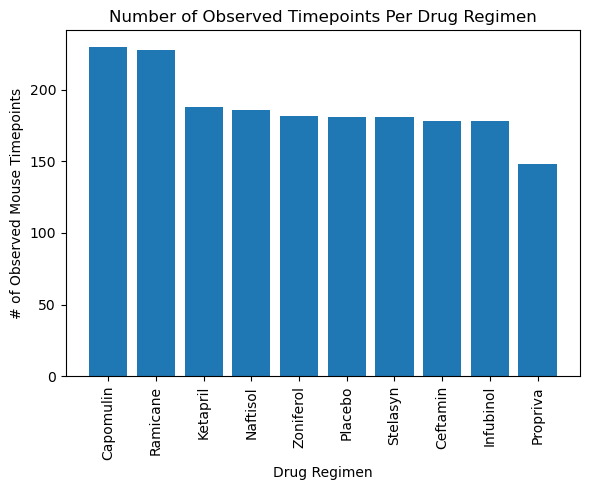

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate number of timepoints per drug regimen
drug_regimens = timepoints_count.index.tolist()
timepoints_values = timepoints_count.values.tolist()

# Plot the bar chart
plt.figure(figsize=(6, 5))
plt.bar(drug_regimens, timepoints_values, color='#1f77b4')
plt.title('Number of Observed Timepoints Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

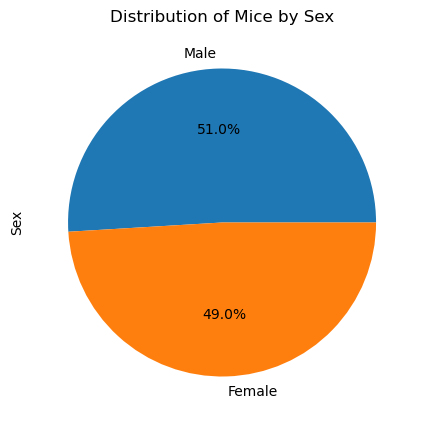

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate distribution of female and male mice
sex_distribution = clean_study_data['Sex'].value_counts()
colors = ['#1f77b4', '#ff7f0e']

# Plot the pie chart
sex_distribution.plot(kind='pie', colors=colors, autopct='%1.1f%%', labels=['Male', 'Female'], figsize=(6, 5))
plt.title('Distribution of Mice by Sex')
plt.ylabel('Sex')
plt.show()

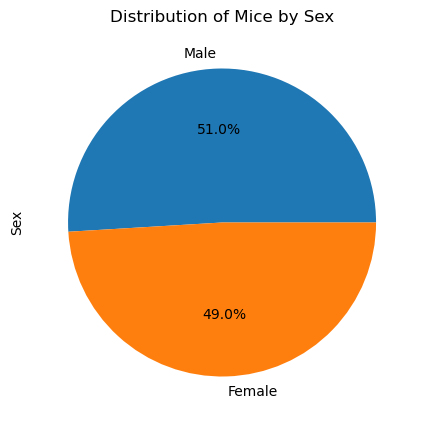

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
values = [sex_distribution['Male'], sex_distribution['Female']]

plt.figure(figsize=(6, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Mice by Sex')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_tumor_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(tumor_vols)
    
    # Calculate IQR for tumor volumes
    quartiles = tumor_vols.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vols[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
    
    print(f"{treatment}'s potential outliers:", outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


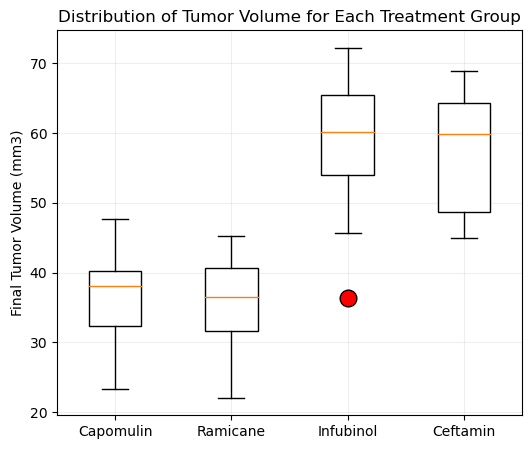

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(6, 5))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, boxprops=dict(facecolor='white'), flierprops=dict(marker='o', markerfacecolor='#ff0000', markersize=12), zorder=2)
plt.grid(True, alpha=0.2, zorder=0)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

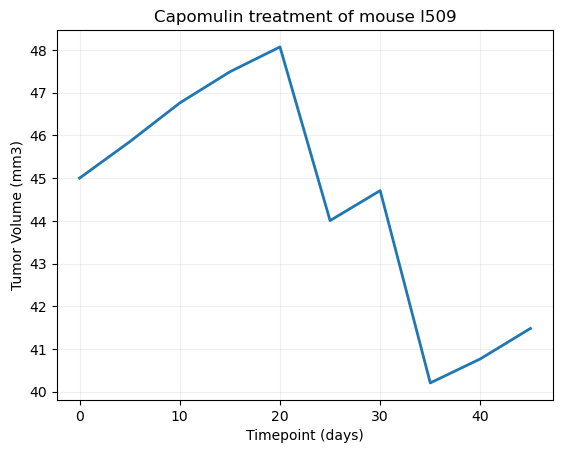

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_study_data[clean_study_data['Mouse ID'] == 'l509']
time_points = mouse_data['Timepoint']
tumor_volumes = mouse_data['Tumor Volume (mm3)']

plt.plot(time_points, tumor_volumes, linewidth='2',color='#1f77b4')
plt.grid(True, alpha=0.2)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

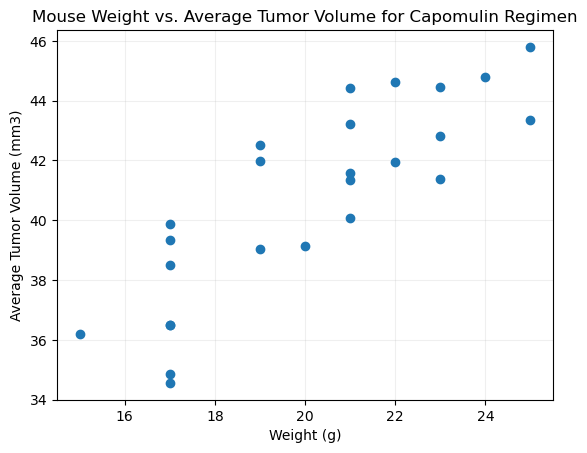

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
avg_mouse_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

avg_weights = avg_mouse_data['Weight (g)']
avg_tumor_vols = avg_mouse_data['Tumor Volume (mm3)']

plt.scatter(avg_weights, avg_tumor_vols, color='#1f77b4', zorder=2)
plt.grid(True, alpha=0.2, zorder=0)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


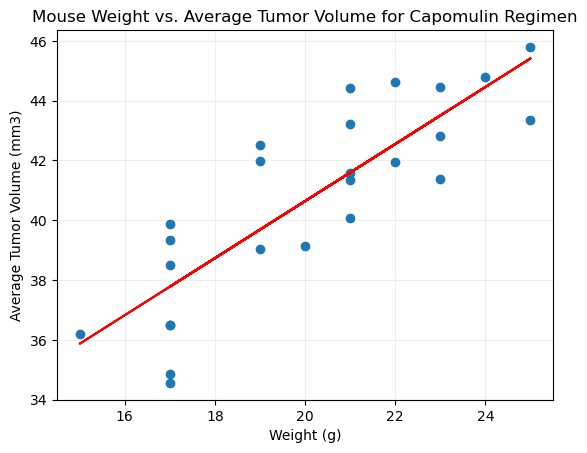

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress, pearsonr

correlation_coefficient, _ = pearsonr(avg_weights, avg_tumor_vols)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

slope, intercept, r_value, p_value, std_err = linregress(avg_weights, avg_tumor_vols)
regres_line = slope * avg_weights + intercept

plt.scatter(avg_weights, avg_tumor_vols, color='#1f77b4', zorder=2)
plt.plot(avg_weights, regres_line, color='red')
plt.grid(True, alpha=0.2, zorder=0)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()